# Descriptive Analytics

Import of packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Import of data

In [2]:
df_Trips = pd.read_csv('boston_2017_cleaned_Trips.csv')
df_Trips

start_time             end_time  start_station_id  \
0        2017-01-01 00:06:58  2017-01-01 00:12:49                67   
1        2017-01-01 00:13:16  2017-01-01 00:28:07                36   
2        2017-01-01 00:16:17  2017-01-01 00:44:10                36   
3        2017-01-01 00:21:22  2017-01-01 00:33:50                46   
4        2017-01-01 00:30:06  2017-01-01 00:40:28                10   
...                      ...                  ...               ...   
1310755  2017-12-31 23:46:18  2017-12-31 23:50:27               117   
1310756  2017-12-29 16:11:56  2017-12-29 16:16:18                54   
1310757  2017-12-30 08:09:44  2017-12-30 08:26:08                54   
1310758  2017-12-30 12:20:01  2017-12-30 12:49:12                54   
1310759  2017-12-30 18:27:39  2017-12-30 18:53:54                54   

         end_station_id                        start_station_name  \
0                   139              MIT at Mass Ave / Amherst St   
1                    10  Boston Public Library - 700 Boylston St.   
2                     9  Boston Public Library - 700 Boylston St.   
3                    19                   Christian Science Plaza   
4                     8             B.U. Central - 725 Comm. Ave.   
...                 ...                                       ...   
1310755             141                      Binney St / Sixth St   
1310756              42                     Tremont St at West St   
1310757              58                     Tremont St at West St   
1310758              46                     Tremont St at West St   
1310759              21                     Tremont St at West St   

                                          end_station_name  bike_id  \
0                                                Dana Park      644   
1                            B.U. Central - 725 Comm. Ave.      230   
2                            Agganis Arena - 925 Comm Ave.      980   
3                                  Buswell St. at Park Dr.     1834   
4            Union Square - Brighton Ave. at Cambridge St.      230   
...                                                    ...      ...   
1310755                                     Kendall Street     1846   
1310756  Boylston St at Arlington St TEMPORARY WINTER L...        2   
1310757                          Beacon St at Arlington St     1534   
1310758  Christian Science Plaza - Massachusetts Ave at...     1978   
1310759                   Prudential Center - Belvedere St       15   

          user_type  start_hour  weekday         duration  
0        Subscriber           0        6  0 days 00:05:51  
1        Subscriber           0        6  0 days 00:14:51  
2          Customer           0        6  0 days 00:27:53  
3        Subscriber           0        6  0 days 00:12:28  
4        Subscriber           0        6  0 days 00:10:22  
...             ...         ...      ...              ...  
1310755  Subscriber          23        6  0 days 00:04:09  
1310756  Subscriber          16        4  0 days 00:04:22  
1310757  Subscriber           8        5  0 days 00:16:24  
1310758  Subscriber          12        5  0 days 00:29:11  
1310759  Subscriber          18        5  0 days 00:26:15  

[1310760 rows x 11 columns]

Reconvert columns with explicit time references to approriate datatype

In [3]:
df_Trips[['start_time','end_time']] = df_Trips[['start_time','end_time']].apply(pd.to_datetime)
df_Trips['duration'] = pd.to_timedelta(df_Trips['duration'])

## 1.1  Temporal Demand Patterns and Seasonality

The temporal demand patterns and seasonality of the dataset is inspected and visualized in the following section. The general approach is to analyze the number of trips, by counting the number of rentals within a specific timefame.

Firstly, the occuring variations in the fleet usage during a week in relation to the specific hour of the day are visualized.

In [4]:
# Aggregation by weekday and start_hour and simply counting the number of rows 
variation_hour_weekday = df_Trips.groupby(['weekday', 'start_hour'])['start_time'].agg('count')

# Because the result of grouping by 2 attributs creates a MultiIndex, we unstack the data to receive a proper table with counts as values
unstacked_hour_weekday = variation_hour_weekday.unstack(level = 0)

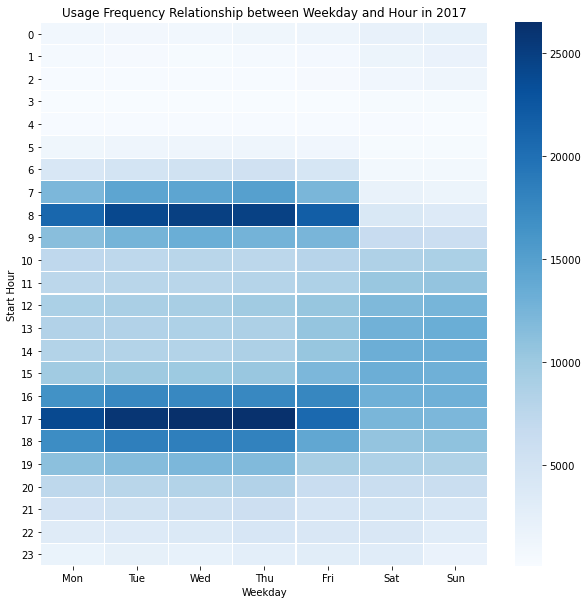

In [5]:
# Create heatmap for the relationship between weekday and start_hour
hm, ax_hm = plt.subplots(figsize = (10,10))

# Prepare mapping of weekday number to its actual name by labeling the x values
hm_x_lables = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sns.heatmap(unstacked_hour_weekday, cmap = "Blues", linewidth = 0.1, xticklabels = hm_x_lables) #annot = True)  # "square = True" to be discussed

plt.title('Usage Frequency Relationship between Weekday and Hour in 2017')
plt.xlabel('Weekday')
plt.ylabel('Start Hour')
plt.yticks(rotation=0)

plt.show()

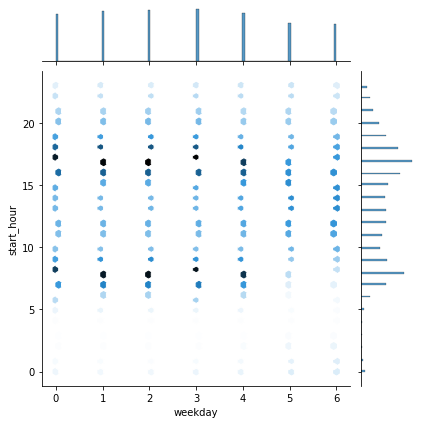

In [6]:
# Test of jointplot for the relationship between weekday and start_hour    (kind = kde requires much time)
filter_day_hour = df_Trips[['weekday', 'start_hour']]
sns.jointplot(x = "weekday", y = "start_hour", data = filter_day_hour, kind = 'hex')

The heatmap visualization already offered a good overview of popular timeframes within the day and week.
Now the usage frequency variations during a day, a week, and the whole year 2017 are more specifically analyzed and visualized to detect patterns.
Therefore, the data is grouped by the considered timeframe and subsequently plotted.

In [7]:
# Grouping by start_hour and aggregating by counting group size through size()
variation_day = df_Trips.groupby('start_hour').size()

# Grouping by weekday and aggregating by counting group size through size()
variation_week = df_Trips.groupby('weekday').size() 

# Grouping and counting by month, which is determined through month attribute of the start_time DatetimeIndex 
variation_year = df_Trips.groupby(pd.DatetimeIndex(df_Trips['start_time']).month).size()


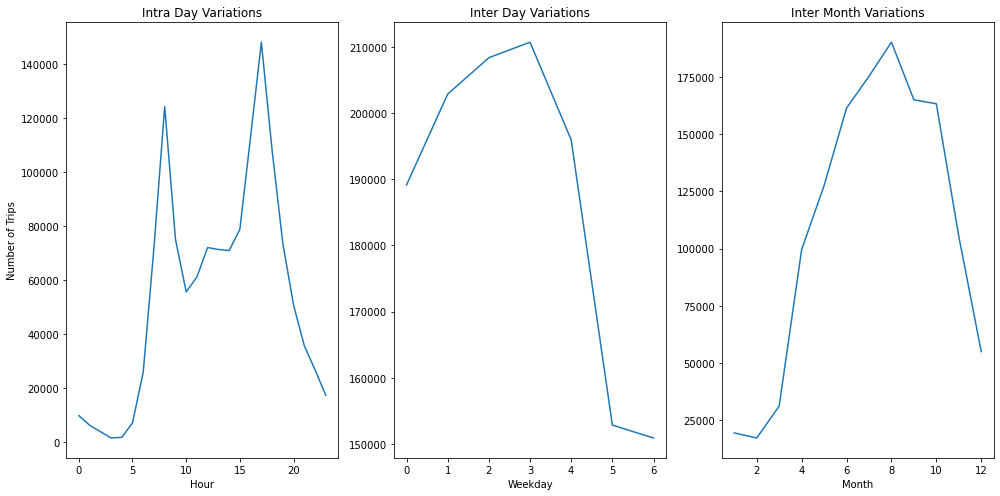

In [8]:
# Plotting the diagrams of the aggregated data for all three variation types in a subplot

plots_variations, axes_variations = plt.subplots(nrows = 1, ncols = 3, figsize = (14,7))

axes_variations[0].plot(variation_day)
axes_variations[0].axis('tight')
axes_variations[0].set_title("Intra Day Variations")
axes_variations[0].set_xlabel('Hour')
axes_variations[0].set_ylabel('Number of Trips')

axes_variations[1].plot(variation_week)
axes_variations[1].axis('tight')
axes_variations[1].set_title("Inter Day Variations")
axes_variations[1].set_xlabel('Weekday')
#axes_variations[1].set_ylabel('Number of Trips')

axes_variations[2].plot(variation_year)
axes_variations[2].axis('tight')
axes_variations[2].set_title("Inter Month Variations")
axes_variations[2].set_xlabel('Month')
#axes_variations[2].set_ylabel('Number of Trips')

# Avoid overlapping and finally plotting the diagrams
plots_variations.tight_layout()
plt.show()

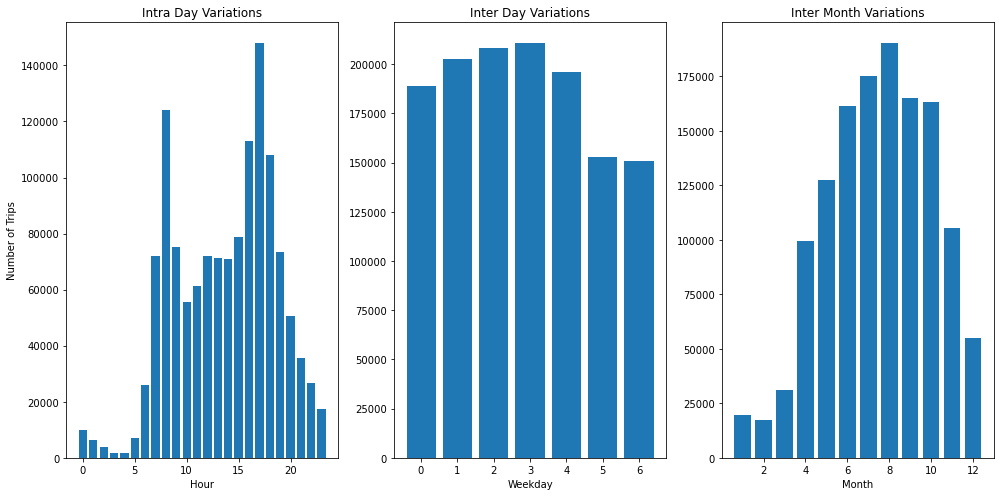

In [9]:
# Alternatively as discrete bar charts
plots_variations, axes_variations = plt.subplots(nrows = 1, ncols = 3, figsize = (14,7))

axes_variations[0].bar(list(variation_day.index.values), variation_day.values)
axes_variations[0].axis('tight')
axes_variations[0].set_title("Intra Day Variations")
axes_variations[0].set_xlabel('Hour')
axes_variations[0].set_ylabel('Number of Trips')

axes_variations[1].bar(list(variation_week.index.values), variation_week.values)
axes_variations[1].axis('tight')
axes_variations[1].set_title("Inter Day Variations")
axes_variations[1].set_xlabel('Weekday')
#axes_variations[1].set_ylabel('Number of Trips')

axes_variations[2].bar(list(variation_year.index.values), variation_year.values)
axes_variations[2].axis('tight')
axes_variations[2].set_title("Inter Month Variations")
axes_variations[2].set_xlabel('Month')
#axes_variations[2].set_ylabel('Number of Trips')

# Avoid overlapping and finally plotting the diagrams
plots_variations.tight_layout()
plt.show()

TODO: Bisher sind das alles nur absolute (= aufsummierte Werte). Man könnte noch relative/ durchschnittliche Werte analysieren

TODO: Wir haben noch über die Nutzung in Relation zu z.B. den Tagen im Monat gesprochen (auch bei den KPIs möglich) --> ggf. dann noch einfügen. 

Ansatz dafür: statt absolute usage pro Monat, durch die Anzahl der Tage teilen mittels pd.DatetimeIndex(df_Trips['start_time']).daysinmonth

Conclusion: The heatmap has already indicated and the three single plots confirmed that most of the trips are carried out during the week at usual working hour starting and ending timeframes . Especially in summer during the week around 8-10 and 16-18 o'clock, most trips are started...


## 1.2 Geographical Demand Patterns

The station frequency of use is analyzed in the following to detect popular and unpopular stations, seperately for start and destination stations.

In [10]:
# Determine the (unique) mapping of station ID to station name to analyze the (un)popular stations also by their name
# Because the same station ID was used for different name spellings, it was not possible to include the station name to aggregation
# Aggregate by station_id and station_name and set index to ID so that the name can be queried by station ID. 
# Then drop rows with duplicated Index
station_mapping = df_Trips[['start_station_id', 'start_station_name']].drop_duplicates().set_index('start_station_id')
station_mapping = station_mapping[~station_mapping.index.duplicated(keep='first')]

To analyze the usage frequency of start and end stations, the dataset is grouped by station IDs to get the overall aggregated number of stations that were used in 2017. The aggregation result is plotted to get a first, visual impression of the usage distribution of start and end stations.

In [11]:
start_station_use = df_Trips.groupby('start_station_id').size()
end_station_use = df_Trips.groupby('end_station_id').size()

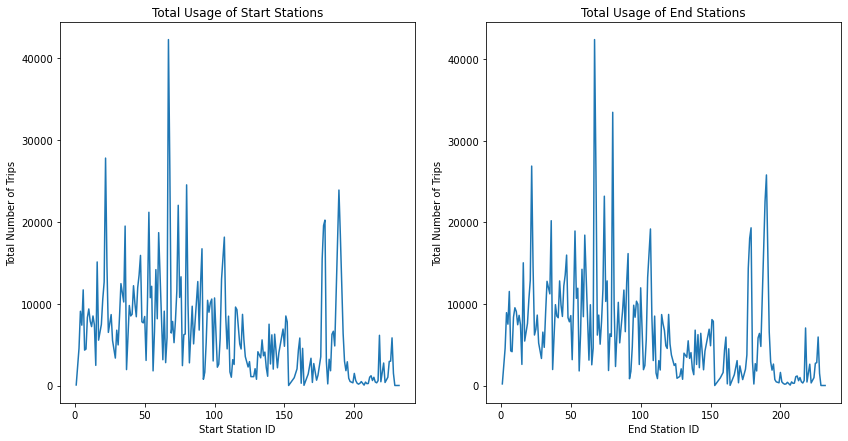

In [12]:
plots_stations, axes_stations = plt.subplots(nrows = 1, ncols = 2, figsize = (14,7))

axes_stations[0].plot(start_station_use)
axes_stations[0].axis('tight')
axes_stations[0].set_title("Total Usage of Start Stations")
axes_stations[0].set_xlabel('Start Station ID')
axes_stations[0].set_ylabel('Total Number of Trips')

axes_stations[1].plot(end_station_use)
axes_stations[1].axis('tight')
axes_stations[1].set_title("Total Usage of End Stations")
axes_stations[1].set_xlabel('End Station ID')
axes_stations[1].set_ylabel('Total Number of Trips')

plt.show()

The plots reveal that there are certain stations which are frequently used, but also many stations that are very unpopular. Both plots look quite similar, what indicates that the (un)popularity of stations is independent from the start and ending of trips, or rather trips are usually carried out between the generally popular stations...

In [13]:
# Detect the 10 most popular start & end stations, including all stations if there are certain ones with same frequency
# Writing the 10 most popular ones for start and end as seperated list in dict, so that they can be printed easily

popular_stations = dict()
popular_stations['start'] = start_station_use.nlargest(10, keep = 'all')
popular_stations['end'] = end_station_use.nlargest(10, keep = 'all')

# Iterate first over dict to distinguish start & end stations, then iterate Series to query the station name by ID and print it with its total frequency 
for kind in popular_stations:
    print("The 10 most popular %s stations in descending order are:" % (kind))
    for station in popular_stations[kind].iteritems():
        print("ID %s: '%s' with %d total uses" % (station[0], station_mapping.loc[station[0], 'start_station_name'], station[1]))
    print("\n")

The 10 most popular start stations in descending order are:
ID 67: 'MIT at Mass Ave / Amherst St' with 42268 total uses
ID 22: 'South Station - 700 Atlantic Ave.' with 27788 total uses
ID 68: 'Central Square at Mass Ave / Essex St' with 26382 total uses
ID 80: 'MIT Stata Center at Vassar St / Main St' with 24517 total uses
ID 189: 'Kendall T' with 23884 total uses
ID 74: 'Harvard Square at Mass Ave/ Dunster' with 22020 total uses
ID 53: 'Beacon St at Massachusetts Ave' with 21167 total uses
ID 179: 'MIT Vassar St' with 20210 total uses
ID 178: 'MIT Pacific St at Purrington St' with 19535 total uses
ID 36: 'Boston Public Library - 700 Boylston St.' with 19481 total uses


The 10 most popular end stations in descending order are:
ID 67: 'MIT at Mass Ave / Amherst St' with 42420 total uses
ID 80: 'MIT Stata Center at Vassar St / Main St' with 33505 total uses
ID 22: 'South Station - 700 Atlantic Ave.' with 26909 total uses
ID 68: 'Central Square at Mass Ave / Essex St' with 26184 total us

In [14]:
# Detect the 10 most unpopular start & end stations, including all stations if there are certain ones with same frequency
unpopular_stations = dict()
unpopular_stations['start'] = start_station_use.nsmallest(10, keep = 'all')
unpopular_stations['end'] = end_station_use.nsmallest(10, keep = 'all')

# Iterate first over dict to distinguish start & end stations, then iterate Series to query the station name by ID and print it with its total frequency 
for kind in unpopular_stations:
    print("The 10 most unpopular %s stations in ascending order are:" % (kind))
    for station in unpopular_stations[kind].iteritems():
        print("ID %s: '%s' with %d total uses" % (station[0], station_mapping.loc[station[0], 'start_station_name'], station[1]))
    print("\n")
        

The 10 most unpopular start stations in ascending order are:
ID 153: '8D OPS 03' with 1 total uses
ID 229: '8D QC Station 01' with 3 total uses
ID 230: '8D QC Station 02' with 3 total uses
ID 232: 'Four Corners - 157 Washington St' with 4 total uses
ID 164: 'Test 000e3' with 23 total uses
ID 207: 'Faneuil St at Market St' with 47 total uses
ID 1: '18 Dorrance Warehouse' with 66 total uses
ID 203: 'Columbia Rd at Ceylon St' with 165 total uses
ID 181: 'Huron Ave. At Vassal Lane' with 197 total uses
ID 209: 'Chelsea St at Saratoga St' with 227 total uses


The 10 most unpopular end stations in ascending order are:
ID 153: '8D OPS 03' with 1 total uses
ID 232: 'Four Corners - 157 Washington St' with 1 total uses
ID 229: '8D QC Station 01' with 3 total uses
ID 230: '8D QC Station 02' with 3 total uses
ID 164: 'Test 000e3' with 20 total uses
ID 207: 'Faneuil St at Market St' with 51 total uses
ID 203: 'Columbia Rd at Ceylon St' with 158 total uses
ID 181: 'Huron Ave. At Vassal Lane' with 18

Additionally, the most popular routes are determined to support the analysis and rationale of popular stations

In [15]:
# Because a route is defined as start to end station, the trips are aggregated by start and end station ID so that the total count for each occuring trip is calculated  
routes = df_Trips.groupby(['start_station_id', 'end_station_id']).size()
top_routes = routes.nlargest(10, keep = 'all')

# After selecting the 10 most popular trips, the trips are printed according to their ID-related station name from the previously defined mapping
print('Most popular routes in descending order were:')
for route in top_routes.iteritems():
    print('FROM "%s" TO "%s"' % (station_mapping.loc[route[0][0], 'start_station_name'], station_mapping.loc[route[0][1], 'start_station_name']))
    

Most popular routes in descending order were:
FROM "Beacon St at Massachusetts Ave" TO "MIT at Mass Ave / Amherst St"
FROM "MIT at Mass Ave / Amherst St" TO "Beacon St at Massachusetts Ave"
FROM "MIT Vassar St" TO "MIT Stata Center at Vassar St / Main St"
FROM "MIT at Mass Ave / Amherst St" TO "MIT Vassar St"
FROM "MIT Vassar St" TO "MIT at Mass Ave / Amherst St"
FROM "MIT Pacific St at Purrington St" TO "MIT Stata Center at Vassar St / Main St"
FROM "MIT Stata Center at Vassar St / Main St" TO "MIT Vassar St"
FROM "Linear Park - Mass. Ave. at Cameron Ave. " TO "Davis Square"
FROM "Davis Square" TO "Linear Park - Mass. Ave. at Cameron Ave. "
FROM "MIT Stata Center at Vassar St / Main St" TO "MIT Pacific St at Purrington St"


The presented patterns reveal that the most popular stations and routes are usually in direct relation to MIT, or central places of interest like Central Square or the Boston Library. This could  also indicate that many students tend to use Bike Sharing...

Geo-Heatmap von Hannes wäre hier sehr passend für

## 1.3 Key Performance Indicators

### 1.3.1 KPI 1: Total Fleet Usager (per Hour)

In contrast to the already analyzed intra and inter day variations in bike usage, we now define a KPI that tracks the overall usage of the bike fleet per hour. This could help to get overview of how the business is running within the last hours.  

In [16]:
# Aggregate by date of the start time and secondly by start_hour, count the number for each group
total_usage_hour = df_Trips.groupby([pd.DatetimeIndex(df_Trips['start_time']).date, df_Trips['start_hour']])['duration'].agg('count')
total_usage_hour.fillna(0, inplace = True)

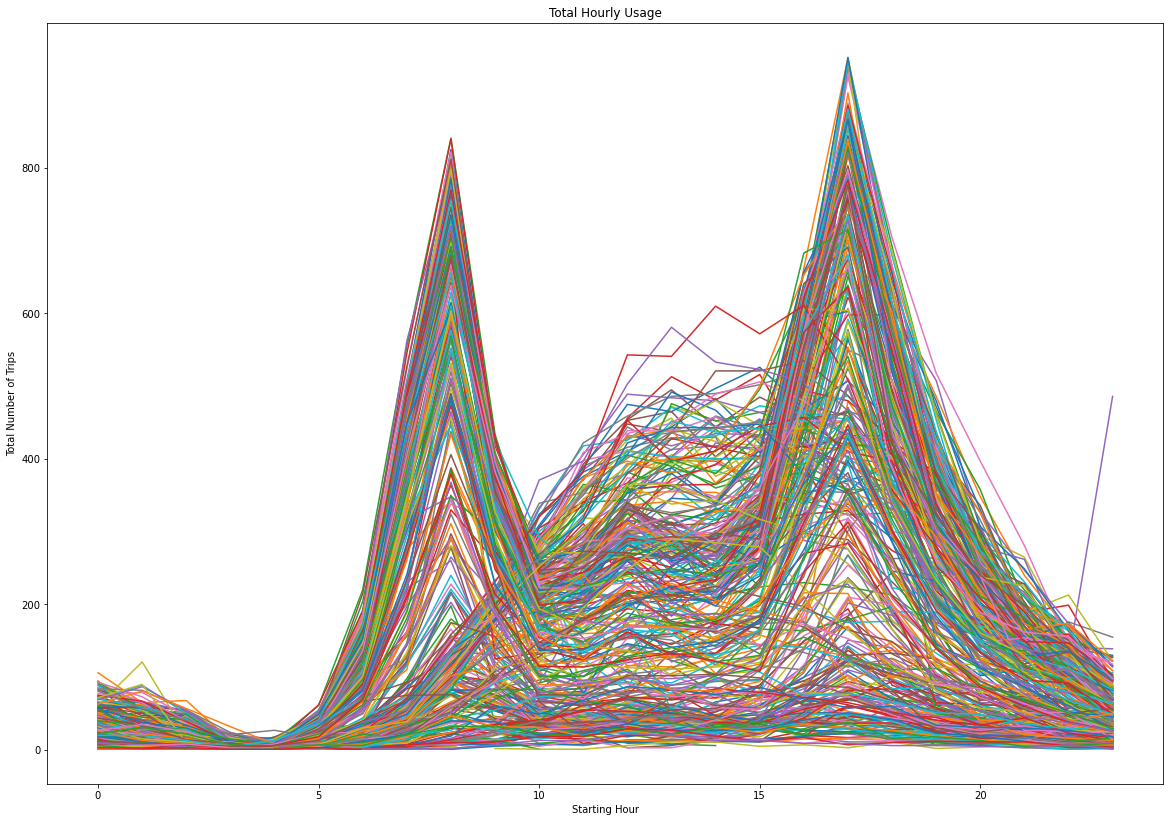

In [17]:
# Plotting the hourly value of the KPI for each day in 2017
hourly_usage, axes_hourly_usage = plt.subplots(nrows = 1, ncols = 1, figsize = (20,14))

# Unstacking and transposing required to properly plot the data
axes_hourly_usage.plot(total_usage_hour.unstack(level = 1).transpose())
axes_hourly_usage.axis('tight')
axes_hourly_usage.set_title('Total Hourly Usage')
axes_hourly_usage.set_xlabel('Starting Hour')
axes_hourly_usage.set_ylabel('Total Number of Trips')

plt.show()

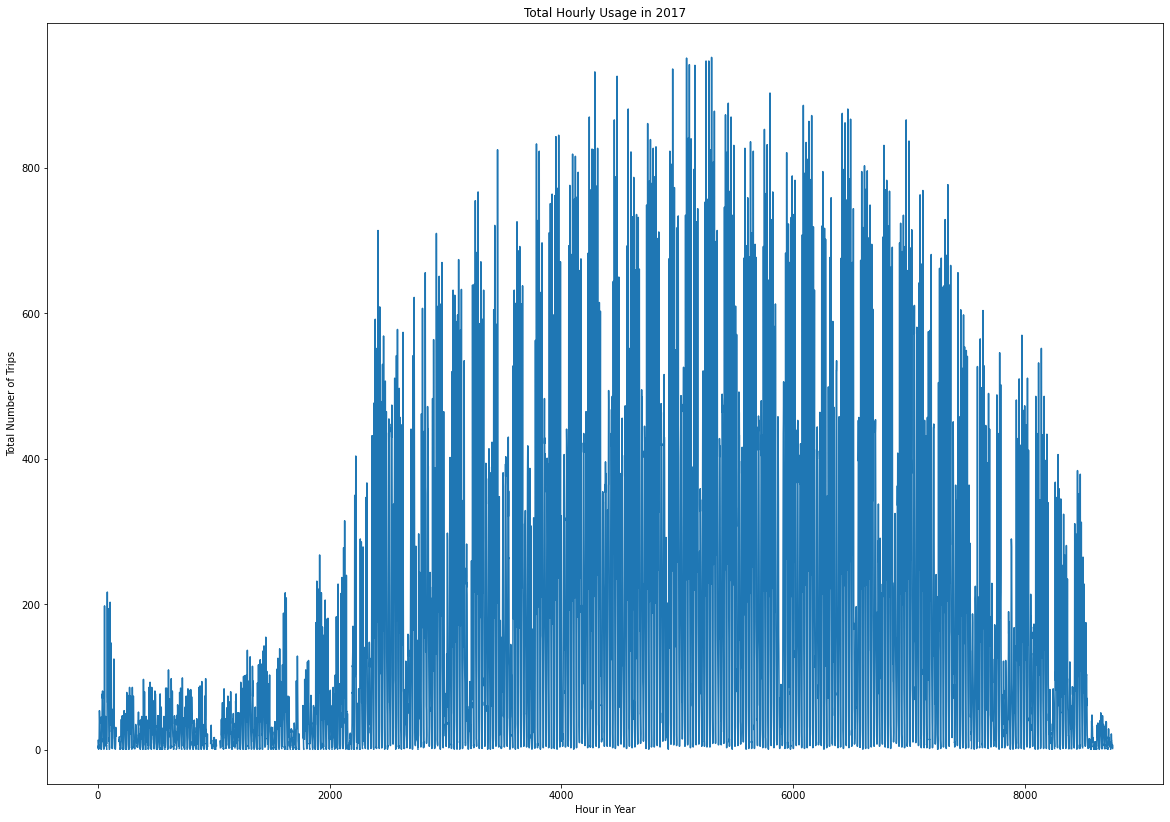

In [173]:
# Completely linear sequence of hourly values: All hourly values of 2017 in linear sequence
# Data is unstacked and then reshaped to linear, 1D array in order to get sequence of all hours of the year 2017

usage_sequenced = total_usage_hour.unstack().values.reshape(1, -1)[0]

hourly_usage_sequenced, axes_usage_sequenced = plt.subplots(nrows = 1, ncols = 1, figsize = (20,14))

axes_usage_sequenced.plot(usage_sequenced)
axes_usage_sequenced.axis('tight')
axes_usage_sequenced.set_title('Total Hourly Usage in 2017')
axes_usage_sequenced.set_xlabel('Hour in Year')
axes_usage_sequenced.set_ylabel('Total Number of Trips')

plt.show()


# 1.3.2 KPI 2: Bicycle Usage

KPi zum Monitoring der Anzahl genutzer Fahärreder, bisher nur eine Idee. Relevanz müsste man mal diskutieren.

Weitere Ideen: Average usager per bicycle, 

In [19]:
# Unique number of bikes in use per hour
# Aggregation by date and start hour, counting the number of unique bike_ides in the specific hour
bikes_used = df_Trips.groupby([pd.DatetimeIndex(df_Trips['start_time']).date, df_Trips['start_hour']]).agg({'bike_id' : 'nunique'})
bikes_used.fillna(0, inplace = True)

# Unstacking to receive proper table that maps start hour to start date
bikes_used.unstack(level = -1)

bike_id                                                      ...  \
start_hour      0    1    2    3    4     5     6      7      8     9   ...   
2017-01-01    11.0  7.0  4.0  2.0  6.0   1.0   6.0    2.0    5.0  13.0  ...   
2017-01-02     9.0  2.0  2.0  1.0  NaN   2.0   5.0   13.0   28.0  43.0  ...   
2017-01-03     8.0  3.0  1.0  1.0  2.0   5.0  22.0   89.0  169.0  39.0  ...   
2017-01-04     5.0  7.0  3.0  1.0  NaN   9.0  31.0  109.0  179.0  82.0  ...   
2017-01-05     9.0  6.0  1.0  NaN  3.0  13.0  26.0  113.0  180.0  99.0  ...   
...            ...  ...  ...  ...  ...   ...   ...    ...    ...   ...  ...   
2017-12-27     3.0  NaN  1.0  NaN  1.0   3.0  12.0   20.0   38.0  39.0  ...   
2017-12-28     2.0  2.0  NaN  NaN  2.0   6.0   8.0   18.0   45.0  31.0  ...   
2017-12-29     5.0  2.0  2.0  NaN  2.0   7.0   6.0   20.0   31.0  33.0  ...   
2017-12-30     3.0  2.0  3.0  1.0  1.0   3.0   1.0    7.0   10.0  11.0  ...   
2017-12-31     5.0  NaN  1.0  NaN  NaN   NaN   1.0    1.0    2.0   7.0  ...   

                                                                           
start_hour    14    15     16     17     18    19    20    21    22    23  
2017-01-01  42.0  35.0   40.0   34.0   30.0  19.0  12.0  14.0  13.0   4.0  
2017-01-02  69.0  74.0   64.0   46.0   39.0  43.0  43.0  11.0  13.0  10.0  
2017-01-03  16.0  23.0   28.0   46.0   39.0   6.0  13.0  11.0  10.0   6.0  
2017-01-04  62.0  81.0  131.0  166.0   78.0  58.0  44.0  29.0  12.0  16.0  
2017-01-05  33.0  66.0  106.0  135.0  102.0  51.0  37.0  23.0  23.0   8.0  
...          ...   ...    ...    ...    ...   ...   ...   ...   ...   ...  
2017-12-27  27.0  26.0   39.0   51.0   40.0  22.0  19.0  12.0   3.0   3.0  
2017-12-28  31.0  24.0   34.0   30.0   26.0  18.0  14.0  10.0   6.0   7.0  
2017-12-29  29.0  38.0   27.0   38.0   15.0  18.0  13.0   5.0   5.0   9.0  
2017-12-30  17.0  12.0   15.0    7.0    9.0  11.0  11.0   9.0   6.0   4.0  
2017-12-31  13.0  13.0    9.0    8.0    6.0   6.0   5.0   3.0   7.0   2.0  

[365 rows x 24 columns]

In [20]:
# Total bikes used per day
bikes_used_day = df_Trips.groupby(pd.DatetimeIndex(df_Trips['start_time']).date).agg({'bike_id' : 'nunique'})
bikes_used_day

bike_id
2017-01-01      280
2017-01-02      410
2017-01-03      387
2017-01-04      610
2017-01-05      561
...             ...
2017-12-27      302
2017-12-28      276
2017-12-29      270
2017-12-30      171
2017-12-31      115

[365 rows x 1 columns]

### 1.3.3 KPI3: Active Utilization Degree (?)

Idee: Anteil der wirklichen Nutzung von Fahrrädern in Relation zur maximal möglichen Auslastung

Dafür benötigt: Ausleihen, die einzelne Stunden überschreiten in mehrere Datensätze aufteilen, damit über Stunden aggregiert werden kann und die wirkliche Nutzung in der jeweiligen Stunde bestimmt werden kann

In [25]:
# Duration splitting per hour: durations that exceed a certain hour are seperated in first place to increase performance

# Algorithm idea: 
# Caclulate total duration in seconds, fill the first hour, add rest of trip durations to subseqeunt hours
# Subsequent hours are new rows, either with duration of full or partial hours, depending on rest of duration
# Then adjust the duration, start & end time of first hour
# Calculate start and end values of added hour rows and assign corresponding rest of the trip duration
# Append added rows to dataframe, then finally merge with the initially seperated trips to receive full dataset
# Should  just be used to aggregate the duration by start time/start hour


# Seperate the whole dataframe in records with durations involving single and multiple hours 
df_dur_split_red = df_Trips[df_Trips['start_hour'] == pd.DatetimeIndex(df_Trips['end_time']).hour]

df_dur_split_pre = df_Trips[df_Trips['start_hour'] != pd.DatetimeIndex(df_Trips['end_time']).hour][['start_time', 'end_time', 'start_hour', 'duration']]

# Create list as collection for the splitted rows that need to be added for analysis
hours_to_append = list()

# Add start_minute and start_second to faciliate the duration splitting
df_dur_split_pre['start_minute'] =  pd.DatetimeIndex(df_dur_split_pre['start_time']).minute
df_dur_split_pre['start_second'] =  pd.DatetimeIndex(df_dur_split_pre['start_time']).second

for index, row in df_dur_split_pre.iterrows():
    
    # Get the whole duration of the trip in seconds
    dur = row[3].total_seconds()

    # Calculate start time in seconds within the first involved hour
    start_seconds = row[4] * 60 + row[5] 
    
    # Update initial record: end_time to end of hour and duration value to fractional value within first hour
    # Formula for duration fraction: Whole hour == 3600 seconds --> dur_first 3600 - total_seconds
    # Formula end_time: start_time + duration in first hour = next following, full hour
    dur_first = 3600 - start_seconds
    df_dur_split_pre.loc[index, 'duration'] = pd.Timedelta(seconds = dur_first)
    df_dur_split_pre.loc[index, 'end_time'] = df_dur_split_pre.loc[index, 'start_time'] + pd.Timedelta(seconds = dur_first) 
                                                                                                       
    # update dur value to determine the duration within the following involved hours: (3600 - start_seconds) substracted from dur
    dur -= 3600 - start_seconds
    
    # initialize an hour counter to update the subsequent start_hours
    hour_counter = 1   

    # iterate as long as there is still duration left to distribute to subsequent hours  
    # add a row for each subsequent hour: need to modify start_time & start_hour and set corresponding duration    
    while(dur):
        
        # Initialize the duration and end_time update to 0 so that it can be caclculated based on different cases
        dur_update = 0
        end_time = 0
        
        # determine the duration within the current (= next following) hour of the iteration 
        # if the duration delta for this hour includes a whole hour, dur value is greater or equal to 3600 
        if dur >= 3600:
            
            # in this case the duration value of the row is set to 3600, because the whole hour is included in duration
            dur_update = 3600
            
            # Also, the end_time will be the next following full hour
            # Formula: add the current number of added hours to start hour & add 1 to get the next hour (= end of current hour) 
            # Additionally substract start_seconds to receive the full hour 
            end_time = (row[0] + pd.Timedelta(hours = hour_counter + 1)) - pd.Timedelta(seconds = start_seconds)
            
        # Otherwise the duration rest just includes minutes, which directly can be added to the new row
        else:
            dur_update = dur
            
            # The end_time in this case is the actual end_time of the initial trip record
            end_time = row[1]
        
        # Update the dur value to determine the possible rest of duration within subsequent hours
        dur -= dur_update
        
        # Create the new row with updated values for the considered hour
        # Start minute and second are set to 0 because we always start new rows at full hour
        hours_to_append.append({'start_time' : (row[0] + pd.Timedelta(hours = 1 * hour_counter)) - pd.Timedelta(seconds = start_seconds),
                                'end_time' : end_time,
                                'start_hour' : ((row[0] + pd.Timedelta(hours = 1 * hour_counter)) - pd.Timedelta(seconds = start_seconds)).hour,
                                'duration' : pd.Timedelta(seconds = dur_update),
                                'start_minute' : 0,
                                'start_second' : 0})
        
        hour_counter += 1
        
# Append all the new records for splitted hours to the dataframe
df_dur_split_pre = df_dur_split_pre.append(hours_to_append, ignore_index = True)

# Final merge
split_concat = pd.concat([df_dur_split_red[['start_time', 'end_time', 'start_hour', 'duration']], df_dur_split_pre[['start_time', 'end_time', 'start_hour', 'duration']]])
#split_concat.to_csv('splitted_hours.csv')

KeyboardInterrupt: 

In [155]:
# Aggregation of active usage time per hour, by grouping by date and start time and summing up the duration
active_usage = split_concat.groupby([pd.DatetimeIndex(split_concat['start_time']).date, pd.DatetimeIndex(split_concat['start_time']).hour]).agg({'duration' : 'sum'})

# Determining the maximumly possible rental capacity per hour: number of bikes multiplied by 3600 seconds (= one hour)
# Tbd.: Approach assumes that in every hour it is possible to rent all bikes that occured in dataset (no actual value available)
max_capacity = len(np.unique(df_Trips[["bike_id"]])) * 3600

# Calculate the active utilization degree per hour
active_usage['utilization'] = active_usage['duration'].dt.total_seconds() / max_capacity 

In [169]:
# Descriptive statistics of the usage degree
active_usage['utilization'].describe()

count    8531.000000
mean        0.021278
std         0.026818
min         0.000001
25%         0.001983
50%         0.008824
75%         0.032413
max         0.151064
Name: utilization, dtype: float64

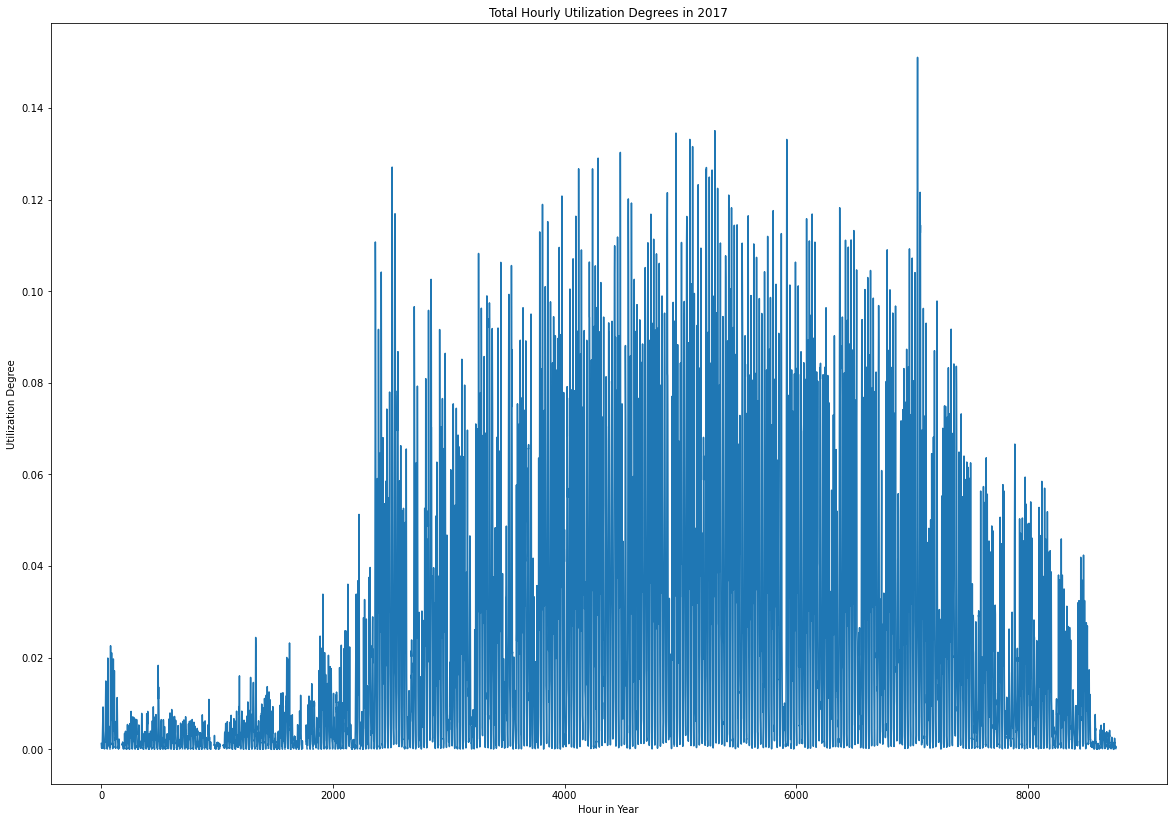

In [174]:
# Plotting the values by unstacking the hours per day and then reshaping to linear sequence of hourly values of the whole year
hourly_utilization_degree, axes_utilization_degree = plt.subplots(nrows = 1, ncols = 1, figsize = (20,14))

axes_utilization_degree.plot(active_usage['utilization'].unstack().values.reshape(1, -1)[0])
axes_utilization_degree.axis('tight')
axes_utilization_degree.set_title('Total Hourly Utilization Degrees in 2017')
axes_utilization_degree.set_xlabel('Hour in Year')
axes_utilization_degree.set_ylabel('Utilization Degree')

plt.show()